In [4]:
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 2 ms


In [5]:
#tfidf to remove common words like aquarium
#spell check
#remove more common words
#Experiment with different parts of speech
#NMF

time: 998 µs


In [6]:
#https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#4whatdoesldado

Error in callback <bound method LineWatcher.stop of <autotime.LineWatcher object at 0x000002739AE77780>> (for post_run_cell):


AssertionError: 

In [7]:
#import modules
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

C:\ProgramData\Anaconda2\envs\py36\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


time: 2.2 s


In [8]:
# prepare NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

time: 343 ms


In [9]:
#import data
df=pd.read_excel('20180821_Tatvam_Export.xlsx')

time: 3.24 s


In [10]:
df.head()

,Unique ID,Review Title,Review Comment,Tatvam Rating,User Rating,Source Name,Review URL,Date,Name,Customer,Parent Value,Value,Tag Tatvam Rating,Review Month
0,5779066,NaN,NaN,0,5,Google Reviews,https://www.google.co.in/maps/place/Georgia+Aq...,"Wednesday, June 6, 2018",Brittany Chadwick,Georgia Aquarium,NaN,NaN,NaN,June
1,5779068,NaN,NaN,0,5,Google Reviews,https://www.google.co.in/maps/place/Georgia+Aq...,"Wednesday, June 6, 2018",Katie Holland Stackable,Georgia Aquarium,NaN,NaN,NaN,June
2,5779071,NaN,NaN,0,5,Google Reviews,https://www.google.co.in/maps/place/Georgia+Aq...,"Wednesday, June 6, 2018",Danielle Desjardins Neydorff,Georgia Aquarium,NaN,NaN,NaN,June
3,5779076,NaN,NaN,0,5,Google Reviews,https://www.google.co.in/maps/place/Georgia+Aq...,"Wednesday, June 6, 2018",Leo Villatoro,Georgia Aquarium,NaN,NaN,NaN,June
4,5779077,NaN,NaN,0,5,Google Reviews,https://www.google.co.in/maps/place/Georgia+Aq...,"Wednesday, June 6, 2018",Rebecca Fetterolf,Georgia Aquarium,NaN,NaN,NaN,June


time: 27.9 ms


In [11]:
#Remove NaN from Comments
df=df.dropna(subset=['Review Comment'])

time: 8.98 ms


In [21]:
df['Review Comment'] = df['Review Comment'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['Review Comment'].head()


4216                                   overpriced !!!!!!!
4217    if you are a police officer dont think you can...
4218    the whale shark looked retarded, fishes wouldn...
4219    it's like a zoo for people, rather than fish. ...
4220    it's like a zoo for people, rather than fish. ...
Name: Review Comment, dtype: object

time: 596 ms


In [22]:
df['Review Comment'] = df['Review Comment'].str.replace('[^\w\s]','')
df['Review Comment'].head()

4216                                          overpriced 
4217    if you are a police officer dont think you can...
4218    the whale shark looked retarded fishes wouldnt...
4219    its like a zoo for people rather than fish ove...
4220    its like a zoo for people rather than fish ove...
Name: Review Comment, dtype: object

time: 329 ms


In [23]:
df['Review Comment'] = df['Review Comment'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))
df['Review Comment'].head()

4216                                           overpriced
4217    police officer dont think bring fire arm aquir...
4218    whale shark looked retarded fishes wouldnt wav...
4219    like zoo people rather fish crowded tiny hallw...
4220    like zoo people rather fish crowded tiny hallw...
Name: Review Comment, dtype: object

time: 2.61 s


In [41]:
#Remove Duplicates
df=df.drop_duplicates(subset=['Unique ID'])

time: 20 ms


In [42]:
df.shape

(6657, 14)

time: 9.98 ms


In [123]:
from textblob import Word
df['Review Comment'] = df['Review Comment'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

4216                                           overpriced
4217    police officer dont think bring fire arm aquir...
4218    whale shark looked retarded fish wouldnt wave ...
4219    like zoo people rather fish crowded tiny hallw...
4221    hard describe disappointed claim largest aquar...
Name: Review Comment, dtype: object

time: 3.28 s


#Term frequency : ratio of the count of a word present in a sentence, to the length of the sentence.
tf1 = (df['Review Comment']).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
#the IDF of each word is the log of the ratio of the total number of rows to the number of rows in which that word is present.
for i,word in enumerate(tf1['words']):
    tf1.loc[i, 'idf'] = np.log(df.shape[0]/(len(df[df['Review Comment'].str.contains(word)])))
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1

#Text Correction
from textblob import TextBlob
df['Review Comment']=df['Review Comment'].apply(lambda x: str(TextBlob(x).correct()))

In [35]:
Common_words = pd.Series(' '.join(df['Review Comment']).split()).value_counts()[:30]
Common_words

aquarium      3216
great         1840
show          1703
place         1677
see           1661
time          1477
dolphin       1284
amazing       1129
whale         1128
experience    1068
get           1047
go             967
visit          953
sharks         940
sea            907
one            843
kids           832
exhibits       784
shows          763
would          745
family         741
really         725
food           714
worth          705
fun            686
loved          682
best           676
day            645
well           642
good           625
dtype: int64

time: 108 ms


In [113]:
Rare_words = pd.Series(' '.join(df['Review Comment']).split()).value_counts()

time: 105 ms


In [114]:
x=pd.DataFrame(Rare_words).reset_index()

time: 6.01 ms


In [117]:
# Convert to list
data = df['Review Comment'].values.tolist()

time: 3.99 ms


In [118]:
#tokenize each sentence into a list of words, removing punctuations and unnecessary characters altogether.
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

time: 498 ms


In [119]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

C:\ProgramData\Anaconda2\envs\py36\lib\site-packages\gensim\models\phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


time: 2.54 s


In [120]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ','VERB','ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

time: 46.9 ms


In [121]:
# Remove Stop Words
#data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)

nlp = spacy.load('en')



time: 932 ms


In [122]:
# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ','VERB','ADV' ])


time: 1min 32s


In [73]:
data_lemmatized

[[],
 ['police',
  'officer',
  'fire',
  'arm',
  'aquirium',
  'security',
  'office',
  'safe',
  'right',
  'customer_service',
  'manager',
  'rude'],
 ['whale', 'shark', 'retarded', 'fish', 'lame'],
 ['zoo',
  'people',
  'fish',
  'tiny',
  'hallway',
  'sign',
  'direct',
  'wrong',
  'area',
  'bad',
  'aquarium'],
 ['describe',
  'disappointed',
  'claim',
  'large',
  'aquarium',
  'exaggerated',
  'square',
  'footage',
  'sponsorship',
  'merchandise',
  'research',
  'phone',
  'find'],
 ['worth',
  'total',
  'chaos',
  'long_line',
  'astronomical',
  'price',
  'food',
  'price',
  'highway',
  'robbery'],
 ['money', 'per_person', 'bad', 'aquarium', 'fish', 'pet', 'store', 'rip'],
 ['love',
  'animal',
  'show',
  'amazing',
  'saturday',
  'march',
  'ticket',
  'card',
  'money',
  'time',
  'call',
  'system',
  'card',
  'hour',
  'bank',
  'aquarium',
  'business',
  'day',
  'ridiculous',
  'week',
  'frustrating',
  'mean',
  'lot',
  'money',
  'use',
  'sister

time: 131 ms


In [58]:
#print(data_lemmatized[:6])

Error in callback <bound method LineWatcher.stop of <autotime.LineWatcher object at 0x000002739AE77780>> (for post_run_cell):


AssertionError: 

In [74]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

time: 259 ms


In [75]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:5]]

[[],
 [('aquirium', 1),
  ('arm', 1),
  ('customer_service', 1),
  ('fire', 1),
  ('manager', 1),
  ('office', 1),
  ('officer', 1),
  ('police', 1),
  ('right', 1),
  ('rude', 1),
  ('safe', 1),
  ('security', 1)],
 [('fish', 1), ('lame', 1), ('retarded', 1), ('shark', 1), ('whale', 1)],
 [('fish', 1),
  ('aquarium', 1),
  ('area', 1),
  ('bad', 1),
  ('direct', 1),
  ('hallway', 1),
  ('people', 1),
  ('sign', 1),
  ('tiny', 1),
  ('wrong', 1),
  ('zoo', 1)],
 [('aquarium', 1),
  ('claim', 1),
  ('describe', 1),
  ('disappointed', 1),
  ('exaggerated', 1),
  ('find', 1),
  ('footage', 1),
  ('large', 1),
  ('merchandise', 1),
  ('phone', 1),
  ('research', 1),
  ('sponsorship', 1),
  ('square', 1)]]

time: 21.9 ms


In [76]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

time: 14.5 s


In [77]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.096*"show" + 0.075*"shark" + 0.073*"whale" + 0.057*"dolphin" + '
  '0.052*"sea" + 0.050*"amazing" + 0.045*"experience" + 0.042*"visit" + '
  '0.035*"worth" + 0.035*"exhibit"'),
 (1,
  '0.078*"hour" + 0.066*"ticket" + 0.039*"people" + 0.037*"attraction" + '
  '0.036*"everything" + 0.034*"much" + 0.031*"line" + 0.031*"age" + '
  '0.029*"crowd" + 0.023*"able"'),
 (2,
  '0.072*"awesome" + 0.066*"beautiful" + 0.048*"tour" + 0.039*"display" + '
  '0.030*"son" + 0.021*"informative" + 0.021*"one" + 0.021*"enough" + '
  '0.019*"behind_scene" + 0.017*"town"'),
 (3,
  '0.039*"section" + 0.037*"school" + 0.033*"photo" + 0.032*"amount" + '
  '0.032*"husband" + 0.029*"number" + 0.028*"floor" + 0.026*"available" + '
  '0.026*"cafeteria" + 0.025*"website"'),
 (4,
  '0.074*"large" + 0.050*"world" + 0.045*"different" + 0.044*"penguin" + '
  '0.026*"creature" + 0.024*"ocean" + 0.022*"specie" + 0.022*"giant" + '
  '0.019*"fantastic" + 0.017*"room"'),
 (5,
  '0.066*"plenty" + 0.037*"free" + 0.033

In [78]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.983172722539871

Coherence Score:  0.4563859800879818
time: 8.42 s


In [79]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
8      28.747997        1       1 -0.342331  0.077572
0      21.177317        1       2 -0.296094 -0.139574
1      10.405154        1       3  0.031344  0.389402
9       8.745772        1       4  0.053691 -0.065923
4       7.050047        1       5  0.072634 -0.058684
6       6.630500        1       6  0.081414 -0.042468
2       5.849604        1       7  0.087374 -0.044815
7       5.624560        1       8  0.085774 -0.046280
3       2.921915        1       9  0.112183 -0.033160
5       2.847129        1      10  0.114010 -0.036068, topic_info=     Category         Freq              Term        Total  loglift  logprob
term                                                                       
17    Default  4061.000000          aquarium  4061.000000  30.0000  30.0000
70    Default  1742.000000              show  1742.000000  29.0000  29.0000
74    Default  1729.000000              time  1729.000000  28.0000  28.0000
15    Default  1362.000000             shark  1362.000000  27.0000  27.0000
16    Default  1320.000000             whale  1320.000000  26.0000  26.0000
211   Default  1614.000000             great  1614.000000  25.0000  25.0000
329   Default   632.000000           atlanta   632.000000  24.0000  24.0000
270   Default  1041.000000           dolphin  1041.000000  23.0000  23.0000
61    Default   697.000000              hour   697.000000  22.0000  22.0000
54    Default   632.000000            animal   632.000000  21.0000  21.0000
134   Default  1232.000000              good  1232.000000  20.0000  20.0000
63    Default   606.000000               lot   606.000000  19.0000  19.0000
119   Default  1192.000000             place  1192.000000  18.0000  18.0000
156   Default   937.000000               sea   937.000000  17.0000  17.0000
53    Default   917.000000           amazing   917.000000  16.0000  16.0000
73    Default   590.000000            ticket   590.000000  15.0000  15.0000
690   Default   546.000000               fun   546.000000  14.0000  14.0000
146   Default   845.000000        experience   845.000000  13.0000  13.0000
33    Default   449.000000             large   449.000000  12.0000  12.0000
323   Default   767.000000             visit   767.000000  11.0000  11.0000
93    Default   422.000000             staff   422.000000  10.0000  10.0000
18    Default   464.000000              area   464.000000   9.0000   9.0000
138   Default   870.000000               kid   870.000000   8.0000   8.0000
604   Default   362.000000           awesome   362.000000   7.0000   7.0000
59    Default   812.000000               day   812.000000   6.0000   6.0000
47    Default   635.000000             worth   635.000000   5.0000   5.0000
483   Default   334.000000         beautiful   334.000000   4.0000   4.0000
210   Default   754.000000            family   754.000000   3.0000   3.0000
372   Default   739.000000              tank   739.000000   2.0000   2.0000
105   Default   879.000000           exhibit   879.000000   1.0000   1.0000
...       ...          ...               ...          ...      ...      ...
148   Topic10    91.578499              free    92.174866   3.5524  -3.2837
581   Topic10    79.807175             night    80.403549   3.5514  -3.4213
577   Topic10    75.750114             cheap    76.346481   3.5510  -3.4734
1782  Topic10    73.787460            amazed    74.383904   3.5508  -3.4997
770   Topic10    61.111698           advance    61.708241   3.5491  -3.6882
1198  Topic10    55.025703               fee    55.622131   3.5481  -3.7931
921   Topic10    53.497372             entry    54.093784   3.5478  -3.8212
655   Topic10    49.796131            return    50.392551   3.5470  -3.8929
1199  Topic10    43.617695               get    44.214146   3.5453  -4.0254
1586  Topic10    42.390186              list    42.986637   3.5449  -4.0540
1306  Topic10    38.231873              b

time: 3.49 s


In [65]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

time: 36.9 ms


In [66]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=20, step=2)

time: 1min 17s


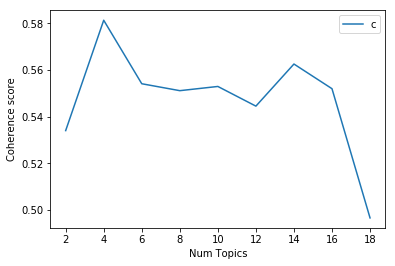

time: 115 ms


In [67]:
# Show graph
limit=20; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()


In [68]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.534
Num Topics = 4  has Coherence Value of 0.5813
Num Topics = 6  has Coherence Value of 0.5541
Num Topics = 8  has Coherence Value of 0.5511
Num Topics = 10  has Coherence Value of 0.5529
Num Topics = 12  has Coherence Value of 0.5445
Num Topics = 14  has Coherence Value of 0.5625
Num Topics = 16  has Coherence Value of 0.552
Num Topics = 18  has Coherence Value of 0.4965
time: 45.9 ms


In [69]:
# Select the model and print the topics
optimal_model = model_list[1]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.046*"great" + 0.036*"aquarium" + 0.025*"time" + 0.023*"family" + '
  '0.023*"experience" + 0.021*"show" + 0.018*"fun" + 0.016*"dolphin" + '
  '0.015*"kid" + 0.014*"staff"'),
 (1,
  '0.052*"aquarium" + 0.034*"shark" + 0.032*"whale" + 0.026*"tank" + '
  '0.020*"amazing" + 0.017*"good" + 0.015*"fish" + 0.013*"large" + '
  '0.012*"exhibit" + 0.010*"well"'),
 (2,
  '0.035*"aquarium" + 0.023*"place" + 0.023*"good" + 0.020*"show" + '
  '0.017*"great" + 0.017*"kid" + 0.015*"day" + 0.014*"visit" + 0.014*"well" + '
  '0.013*"whale"'),
 (3,
  '0.033*"aquarium" + 0.028*"time" + 0.023*"show" + 0.018*"not" + '
  '0.016*"amazing" + 0.015*"sea" + 0.013*"atlanta" + 0.013*"place" + '
  '0.012*"dolphin" + 0.012*"hour"')]
time: 77.8 ms


In [70]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(optimal_model, corpus, id2word)
vis

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
3      36.402840        1       1 -0.007586 -0.051737
2      24.384516        1       2  0.005329 -0.046083
1      19.613712        1       3 -0.093322  0.050272
0      19.598932        1       4  0.095578  0.047548, topic_info=     Category         Freq           Term        Total  loglift  logprob
term                                                                    
237   Default  1656.000000          great  1656.000000  30.0000  30.0000
415   Default   660.000000           tank   660.000000  29.0000  29.0000
17    Default  1365.000000          shark  1365.000000  28.0000  28.0000
18    Default  1347.000000          whale  1347.000000  27.0000  27.0000
62    Default  1024.000000        amazing  1024.000000  26.0000  26.0000
236   Default   764.000000         family   764.000000  25.0000  25.0000
584   Default   595.000000            fun   595.000000  24.0000  24.0000
19    Default  3677.000000       aquarium  3677.000000  23.0000  23.0000
161   Default   867.000000            kid   867.000000  22.0000  22.0000
157   Default  1211.000000           good  1211.000000  21.0000  21.0000
169   Default   954.000000     experience   954.000000  20.0000  20.0000
87    Default  1766.000000           time  1766.000000  19.0000  19.0000
108   Default   456.000000          staff   456.000000  18.0000  18.0000
14    Default   490.000000           fish   490.000000  17.0000  17.0000
160   Default   280.000000       friendly   280.000000  16.0000  16.0000
37    Default   410.000000          large   410.000000  15.0000  15.0000
221   Default   729.000000           well   729.000000  14.0000  14.0000
70    Default   771.000000            day   771.000000  13.0000  13.0000
1413  Default   105.000000  knowledgeable   105.000000  12.0000  12.0000
454   Default   250.000000           cool   250.000000  11.0000  11.0000
1425  Default   282.000000            age   282.000000  10.0000  10.0000
138   Default  1367.000000          place  1367.000000   9.0000   9.0000
881   Default   303.000000          world   303.000000   8.0000   8.0000
83    Default  1812.000000           show  1812.000000   7.0000   7.0000
2111  Default   120.000000           dive   120.000000   6.0000   6.0000
1142  Default   339.000000      wonderful   339.000000   5.0000   5.0000
1381  Default   148.000000    educational   148.000000   4.0000   4.0000
55    Default   282.000000           ever   282.000000   3.0000   3.0000
543   Default   213.000000         always   213.000000   2.0000   2.0000
511   Default   133.000000        helpful   133.000000   1.0000   1.0000
...       ...          ...            ...          ...      ...      ...
171    Topic4    55.519318           free    77.276421   1.2990  -5.8432
1381   Topic4    96.372910    educational   148.051193   1.2004  -5.2917
169    Topic4   431.228363     experience   954.480835   0.8352  -3.7933
1759   Topic4    43.503788      cant_wait    63.877026   1.2456  -6.0871
270    Topic4    56.585514       birthday    89.039719   1.1764  -5.8241
543    Topic4   111.424637         always   213.522736   0.9793  -5.1466
699    Topic4    93.547882       everyone   180.984695   0.9698  -5.3214
161    Topic4   284.376587            kid   867.246094   0.5147  -4.2096
13     Topic4   169.443863           back   434.258301   0.6886  -4.7274
87     Topic4   469.584259           time  1766.194092   0.3050  -3.7081
224    Topic4   129.967026          child   325.239105   0.7124  -4.9926
242    Topic4   109.737381          adult   258.240509   0.7739  -5.1618
303    Topic4   302.650909        dolphin  1134.783203   0.3081  -4.1473
19     Topic4   686.315735       aquarium  3677.449219  -0.0489  -3.3286
83     Topic4   404.582123           show  1812.845825   0.1299  -3.8570
443    Topic4   159.275146        georgia   604.133179   0.2965  -4.7893
234    Topic4    73.408867        display   174.499908  

time: 2.63 s
